#<b>Milestone 2

###<b> Mounting the Drive

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<b>Loading libraries</b>

In [18]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [19]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Data Science/ADSP/DataSets/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

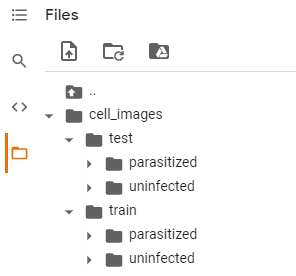

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [20]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [21]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)
    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass
#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [22]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [23]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b>Normalize the images

In [24]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images / 255).astype('float32')
test_images = (test_images / 255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [25]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

In [ ]:
train_labels.shape

(24958, 2)

In [ ]:
train_images.shape

(24958, 64, 64, 3)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

In [ ]:
train_images.shape

(24958, 64, 64, 3)

####<b> Importing the required libraries

In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [ ]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [ ]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 101s 161ms/step - loss: 0.4035 - accuracy: 0.8021 - val_loss: 0.1766 - val_accuracy: 0.9291
Epoch 2/20
624/624 [==============================] - 99s 158ms/step - loss: 0.1163 - accuracy: 0.9577 - val_loss: 0.1023 - val_accuracy: 0.9858
Epoch 3/20
624/624 [==============================] - 99s 159ms/step - loss: 0.0906 - accuracy: 0.9696 - val_loss: 0.1222 - val_accuracy: 0.9750
Epoch 4/20
624/624 [==============================] - 99s 159ms/step - loss: 0.0792 - accuracy: 0.9743 - val_loss: 0.0900 - val_accuracy: 0.9832
Epoch 5/20
624/624 [==============================] - 104s 167ms/step - loss: 0.0742 - accuracy: 0.9740 - val_loss: 0.0814 - val_accuracy: 0.9830
Epoch 6/20
624/624 [==============================] - 102s 164ms/step - loss: 0.0716 - accuracy: 0.9756 - val_loss: 0.0728 - val_accuracy: 0.9820
Epoch 7/20
624/624 [==============================] - 101s 161ms/step - loss: 0.0675 - accuracy: 0.9764 - val_loss: 0.0794 - va

####<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 6s 61ms/step - loss: 0.0570 - accuracy: 0.9842

 Test_Accuracy:- 0.9842307567596436


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



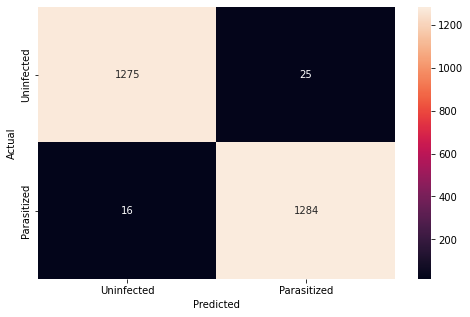

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [42]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

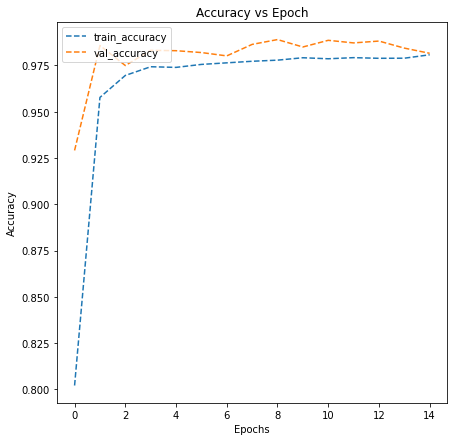

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [11]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
#creating sequential model
model1=Sequential()

# Build the model here
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2)) 


model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2,activation="softmax"))#2 represent output layer neurons 


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
history1=model1.fit(train_images,train_labels,batch_size=64,callbacks=callbacks,  validation_split=0.2,epochs=20,verbose=1)
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
# history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
312/312 [==============================] - 93s 296ms/step - loss: 0.0776 - accuracy: 0.9751 - val_loss: 0.0620 - val_accuracy: 0.9866
Epoch 2/20
312/312 [==============================] - 90s 290ms/step - loss: 0.0738 - accuracy: 0.9749 - val_loss: 0.0697 - val_accuracy: 0.9832
Epoch 3/20
312/312 [==============================] - 91s 291ms/step - loss: 0.0684 - accuracy: 0.9770 - val_loss: 0.0837 - val_accuracy: 0.9792


####<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 4s 42ms/step - loss: 0.0646 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



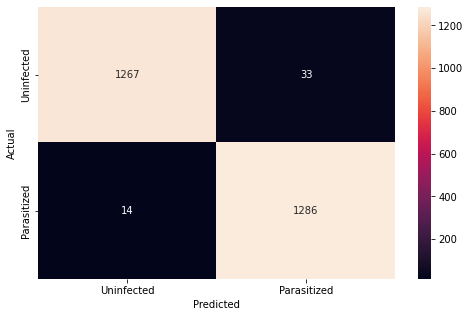

In [ ]:
pred1 = model1.predict(test_images)
pred1 = np.argmax(pred1,axis = 1) 
y_true_1 = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true_1,pred1))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true_1,pred1)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

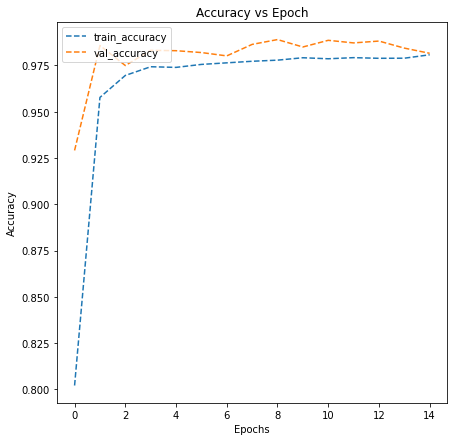

In [ ]:
plot_accuracy(history)

####<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(Conv2D(32, (3,3),padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))

model2.add(BatchNormalization())

model2.add(Conv2D(32, (3,3),  padding='same'))
model2.add(LeakyReLU(0.1))

model2.add(Conv2D(32, (3,3),  padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())



model2.add(Flatten())

model2.add(Dense(512,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dense(2,activation="softmax"))#2 represent output layer neurons 

adam = optimizers.Adam(learning_rate=0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

####<b>Compiling the model

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
'''

create the callbacks similarly as done in the base model
As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 357s 570ms/step - loss: 0.2311 - accuracy: 0.9083 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 2/20
624/624 [==============================] - 348s 558ms/step - loss: 0.1014 - accuracy: 0.9647 - val_loss: 0.2393 - val_accuracy: 0.9381
Epoch 3/20
624/624 [==============================] - 349s 559ms/step - loss: 0.0794 - accuracy: 0.9720 - val_loss: 0.0082 - val_accuracy: 0.9970
Epoch 4/20
624/624 [==============================] - 350s 560ms/step - loss: 0.0653 - accuracy: 0.9772 - val_loss: 0.3218 - val_accuracy: 0.8582
Epoch 5/20
624/624 [==============================] - 347s 555ms/step - loss: 0.0580 - accuracy: 0.9801 - val_loss: 0.0414 - val_accuracy: 0.9860


<b>Plotting the train and validation accuracy

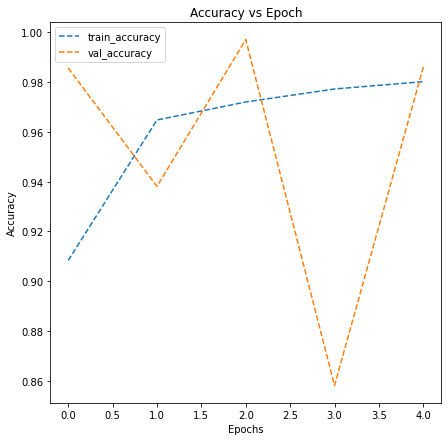

In [ ]:
# plotting the accuracies
plot_accuracy(history2)

####<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy
accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 12s 139ms/step - loss: 0.0742 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


#####<b>Observations and insights: 
- The validation and training accuracy keep intersecting in the accuracy plot showing the effects of LeakyReLU negative values during backpropagation
- Validation accuracy being lower than training accuracy indicates the need for data augmentation for improvements.

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



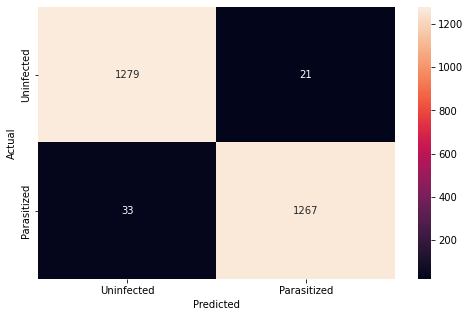

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [34]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)

####**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

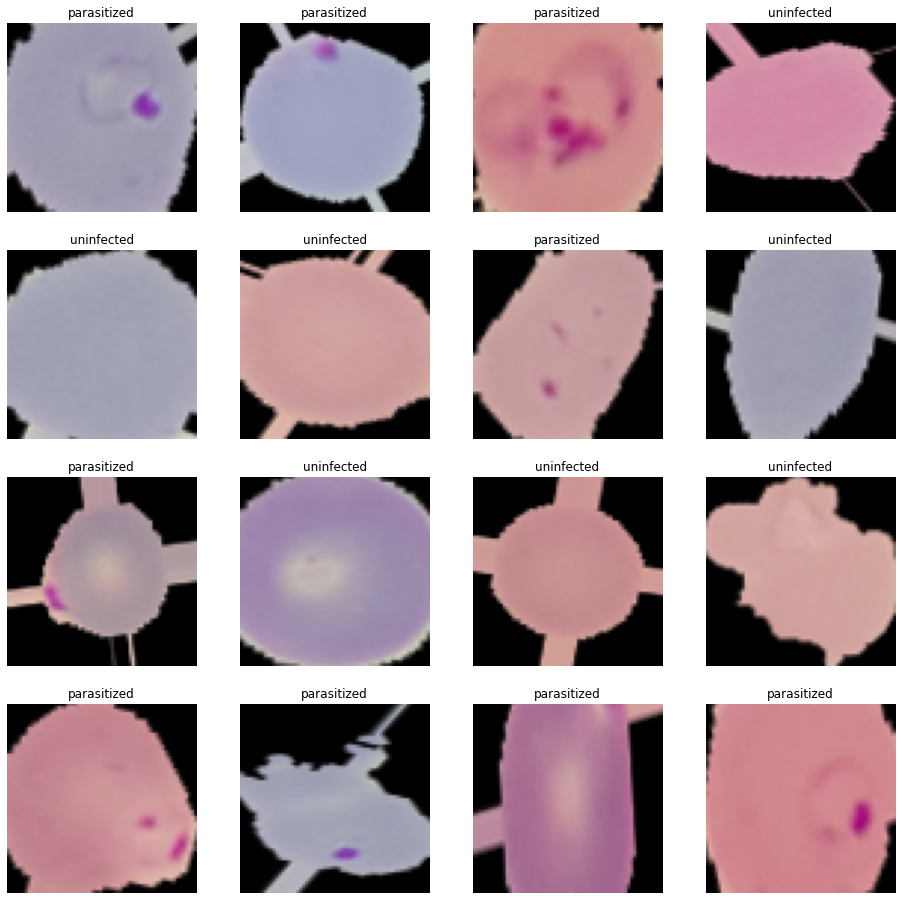

In [36]:
#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#####<b>Observations and insights: 
- Augmented images still show purple/red marks indicating the presence of the parasite. We can use these for a new model which should lead to less overfitting and improve validation accuracy

####<b>Building the Model

In [37]:
model3 = Sequential()

# Build the model here
model3.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model3.add(LeakyReLU(0.1))
model3.add(Conv2D(32, (3,3),padding='same'))
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))

model3.add(BatchNormalization())

model3.add(Conv2D(32, (3,3),  padding='same'))
model3.add(LeakyReLU(0.1))

model3.add(Conv2D(32, (3,3),  padding='same'))
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(BatchNormalization())



model3.add(Flatten())

model3.add(Dense(512))
model3.add(Dropout(0.2))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons 

# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)
model3.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

<b>Using Callbacks

In [38]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and Train the model

In [39]:
history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=20,verbose=1)

Epoch 1/20
312/312 [==============================] - 350s 1s/step - loss: 1.0321 - accuracy: 0.7886 - val_loss: 0.3649 - val_accuracy: 0.8516
Epoch 2/20
312/312 [==============================] - 350s 1s/step - loss: 0.2527 - accuracy: 0.9140 - val_loss: 0.1346 - val_accuracy: 0.9507
Epoch 3/20
312/312 [==============================] - 346s 1s/step - loss: 0.1954 - accuracy: 0.9328 - val_loss: 0.0953 - val_accuracy: 0.9665
Epoch 4/20
312/312 [==============================] - 345s 1s/step - loss: 0.1797 - accuracy: 0.9391 - val_loss: 0.1355 - val_accuracy: 0.9563
Epoch 5/20
312/312 [==============================] - 344s 1s/step - loss: 0.1708 - accuracy: 0.9394 - val_loss: 0.1536 - val_accuracy: 0.9511


####<B>Evaluating the model

<b>Plot the train and validation accuracy

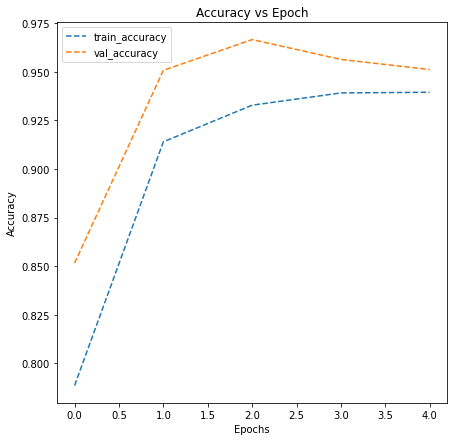

In [43]:
# plotting the accuracies
plot_accuracy(history3)

In [44]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 11s 135ms/step - loss: 0.1315 - accuracy: 0.9562

 Test_Accuracy:- 0.9561538696289062


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1300
           1       0.99      0.92      0.95      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



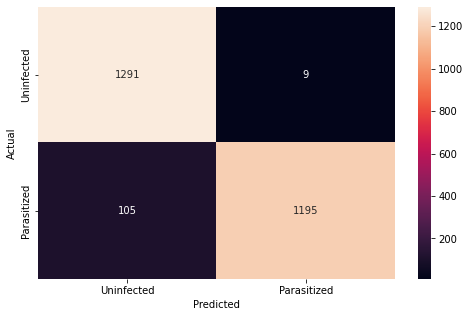

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [64]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [66]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Add a dense layer with 64 neurons
pred = Dense(64, activation='relu')(x)

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

####<b>Compiling the model

In [67]:
# Compiling the model 
adam = optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])

<b> using callbacks

In [68]:
# Adding Callbacks to the model

#callbacks = [EarlyStopping(monitor='val_loss', patience=2), ModelCheckpoint('vgg16_1.h5', monitor='val_loss', save_best_only=True)]

callbacks = [EarlyStopping(monitor='val_loss', patience=2), ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [69]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(
  train_images,
            train_labels,
            epochs=10,
            callbacks=callbacks,
            batch_size=32,
            validation_split=0.2,
            verbose=1)

Epoch 1/10
624/624 [==============================] - 1040s 2s/step - loss: 0.2615 - accuracy: 0.8918 - val_loss: 0.2620 - val_accuracy: 0.8872
Epoch 2/10
624/624 [==============================] - 1031s 2s/step - loss: 0.2029 - accuracy: 0.9215 - val_loss: 0.3422 - val_accuracy: 0.8754
Epoch 3/10
624/624 [==============================] - 1031s 2s/step - loss: 0.1890 - accuracy: 0.9275 - val_loss: 0.1811 - val_accuracy: 0.9443
Epoch 4/10
624/624 [==============================] - 1028s 2s/step - loss: 0.1791 - accuracy: 0.9304 - val_loss: 0.1247 - val_accuracy: 0.9675
Epoch 5/10
624/624 [==============================] - 1020s 2s/step - loss: 0.1709 - accuracy: 0.9357 - val_loss: 0.1158 - val_accuracy: 0.9758
Epoch 6/10
624/624 [==============================] - 1022s 2s/step - loss: 0.1636 - accuracy: 0.9396 - val_loss: 0.1429 - val_accuracy: 0.9583
Epoch 7/10
624/624 [==============================] - 1026s 2s/step - loss: 0.1564 - accuracy: 0.9426 - val_loss: 0.1439 - val_accuracy:

<b>Plot the train and validation accuracy

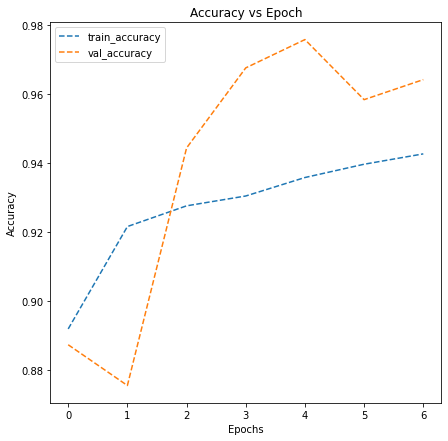

In [70]:
# plotting the accuracies
plot_accuracy(history4)

#####**Observations and insights: **

- Training accuracy is higher than validation accuracy for the first 2 epochs.
- There is overfitting occuring

####<b> Evaluating the model

In [71]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 123s 1s/step - loss: 0.1752 - accuracy: 0.9415

 Test_Accuracy:- 0.9415384531021118


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



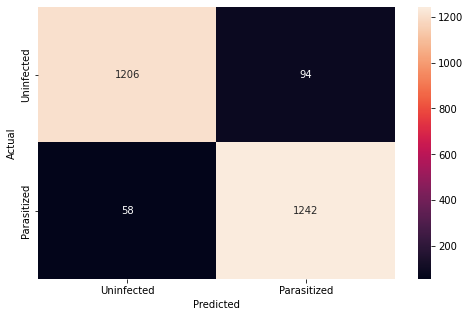

In [72]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


###<b> Observations and Conclusions drawn from the final model:
- The VGG16 performed the worst out of all the models:
- Lower F1 score and accuracy, lower precision, and highest number of false negatives.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?